In [136]:
! pip install pydub
! pip install librosa
! pip insdtall scipy
! pip install matplotlib

ERROR: unknown command "insdtall" - maybe you meant "install"


In [2]:
from scipy.io import wavfile
from librosa import resample, load
import numpy as np

data_initial, sample_rate_intial = load("Sweep20-20_20sec_-6dB_48k-_1_.wav", sr=None)
data_micro, sample_rate_micro = load("свипер_записанный.wav", sr=None)

print('Длины аудиосигналов: ', len(data_initial), len(data_micro))
print('Частоты дискретизации: ', sample_rate_intial, sample_rate_micro)

Длины аудиосигналов:  958056 882688
Частоты дискретизации:  48000 44100


In [3]:
sr_micro_new = 48000
resampled_micro = resample(data_micro, orig_sr=sample_rate_micro, target_sr=sr_micro_new)

(958056,)
(960749,)


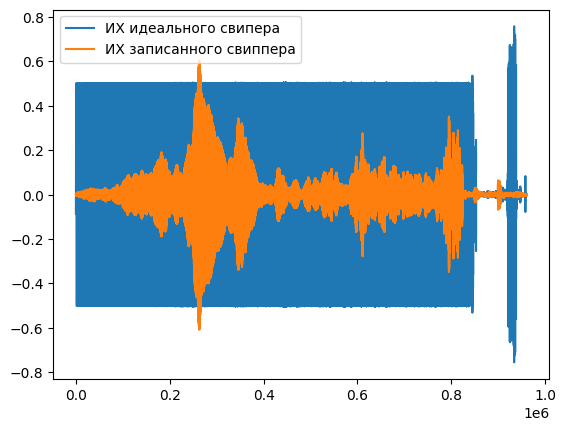

In [4]:
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt

print(data_initial.shape)
print(resampled_micro.shape)

plt.plot(data_initial)
plt.plot(resampled_micro)
plt.legend(['ИХ идеального свипера', 'ИХ записанного свиппера'])

In [6]:
# выравнивание сигналов по времени
from align_signals import align_signals

ref_aligned, target_aligned, delay = align_signals(resampled_micro, data_initial)

Сдвиг: 21447 отсчетов


In [8]:
print('Длины аудиосигналов: ', len(ref_aligned), len(target_aligned))

Длины аудиосигналов:  960749 960749


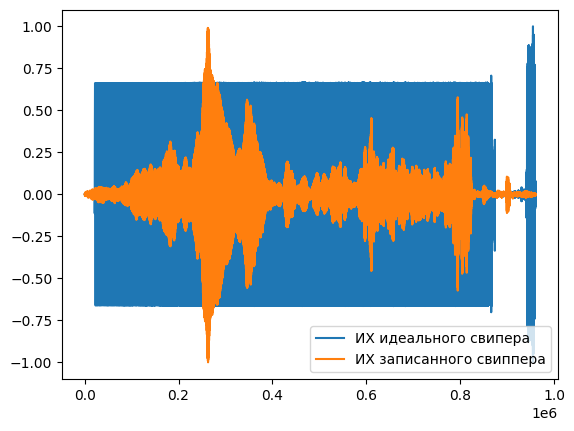

In [12]:
plt.plot(target_aligned)
plt.plot(ref_aligned)
plt.legend(['ИХ идеального свипера', 'ИХ записанного свиппера'])

Text(0, 0.5, 'амплитуда')

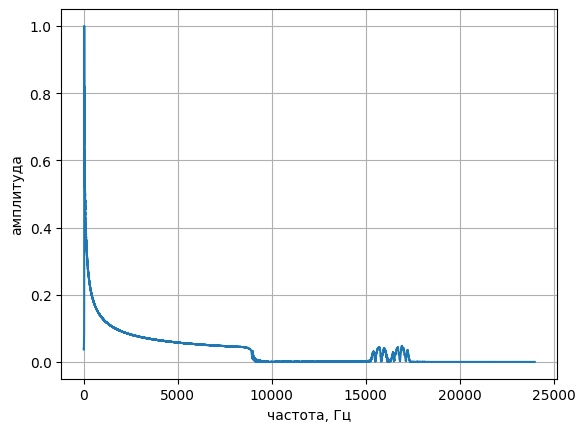

In [16]:
# Перевод в частотную область идеальный свипер
spectrum_initial = np.abs(fft(target_aligned))
specrt_normilized_in = spectrum_initial / np.max(spectrum_initial)
xf1 = fftfreq(len(spectrum_initial), 1 / sample_rate_intial)

positive_freq1 = xf1[:len(target_aligned) // 2]

plt.plot(positive_freq1, specrt_normilized_in[:len(target_aligned) // 2])
plt.grid()
plt.xlabel('частота, Гц')
plt.ylabel('амплитуда')

Text(0, 0.5, 'амплитуда')

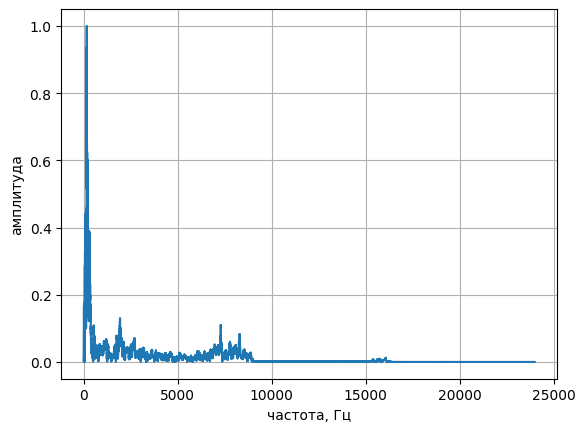

In [17]:
# Переводим в частотную область записанный свипер
spectrum = np.abs(fft(ref_aligned))
specrt_normilized = spectrum / np.max(spectrum)
xf2 = fftfreq(len(ref_aligned), 1 / sr_micro_new)

positive_freq2 = xf2[:len(ref_aligned) // 2]

plt.plot(positive_freq2, specrt_normilized[:len(ref_aligned) // 2])
plt.grid()
plt.xlabel('частота, Гц')
plt.ylabel('амплитуда')

In [65]:
from get_coeffs import get_coeffs

coeffs_in = get_coeffs(specrt_normilized_in[:len(target_aligned) // 2])
coeffs = get_coeffs(specrt_normilized[:len(ref_aligned) // 2])

In [75]:
print(coeffs_in)
print()
print(coeffs)

[2.50845701e-01 1.23407111e-01 9.46696922e-02 7.98343122e-02
 7.03263804e-02 6.35794923e-02 5.84479272e-02 5.43980412e-02
 5.10989018e-02 4.83448654e-02 4.59610485e-02 4.00287956e-02
 3.59706813e-03 2.31089885e-04 3.02078057e-04 3.26282781e-04
 3.03764333e-04 3.49944399e-04 3.88318382e-04 5.90361597e-04
 1.66261606e-02 1.80867817e-02 2.66810320e-02 2.32644938e-03
 1.56104201e-04 9.35871321e-06 9.14356042e-06 9.02679312e-06
 8.93539618e-06 8.85569989e-06 8.80662992e-06 8.78287938e-06]

[1.51820511e-01 3.15284207e-02 4.16967459e-02 3.24621387e-02
 2.04434562e-02 1.63696110e-02 1.41015770e-02 1.07858488e-02
 1.68741122e-02 3.24740820e-02 2.90693119e-02 2.10918430e-02
 8.76990263e-04 1.22490223e-04 1.23594480e-04 1.26808183e-04
 1.17972777e-04 1.16053452e-04 1.19865770e-04 1.39939017e-04
 2.40406138e-03 2.64955102e-03 3.86504071e-05 9.45074771e-06
 5.70335715e-06 3.71104670e-06 3.30261196e-06 2.87200464e-06
 7.65827679e-07 1.79902287e-07 1.25398003e-07 1.02903634e-07]


In [76]:
# набор гейнов эквалайзера
gains = coeffs / coeffs_in
inv_gains = 1 / gains
print(inv_gains)
len(inv_gains)

[  1.65225172   3.91415452   2.27043358   2.45930538   3.44004358
   3.8839953    4.1447795    5.04346408   3.02824239   1.48872154
   1.58108484   1.89783299   4.10160555   1.88659862   2.44410638
   2.573042     2.57486804   3.0153726    3.23961029   4.2187062
   6.9158636    6.8263572  690.31697333 246.16564216  27.37058137
   2.52185272   2.76858454   3.14302874  11.66763285  49.22505458
  70.22942714  85.3505268 ]


32

240000


240000

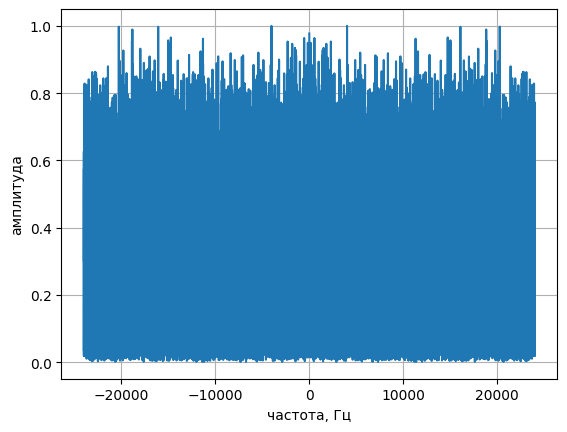

In [106]:
noise, noise_sample_rate = load("370830__deleted_user_5959249__white-noise (1).wav", sr=None)
print(len(noise))
spectr_noise = np.abs(fft(noise))

noise_normilized = spectr_noise / np.max(spectr_noise)
xf3 = fftfreq(len(noise), 1 / noise_sample_rate)


plt.plot(xf3, noise_normilized)
plt.grid()
plt.xlabel('частота, Гц')
plt.ylabel('амплитуда')
noise_sample_rate
len(noise_normilized)

In [107]:
# выбрано 32 полосы
afr = noise_normilized
elem_in_lane = len(afr) // 32

for k in range(1, 32):
    afr[(k - 1) * elem_in_lane : k * elem_in_lane] *= inv_gains[k]
afr[31 * elem_in_lane : len(afr)] *= inv_gains[31]

print(afr)
len(afr)
max(inv_gains)

[ 3.826638    0.23576972  0.2836675  ... 38.69605     6.185543
  5.1411023 ]


np.float64(690.3169733314019)

np.float32(688.5053)

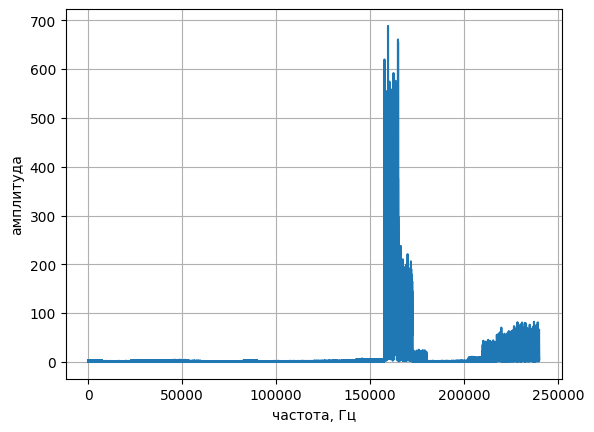

In [108]:
plt.plot(afr)
plt.grid()
plt.xlabel('частота, Гц')
plt.ylabel('амплитуда')
max(afr)

Text(0, 0.5, 'амплитуда')

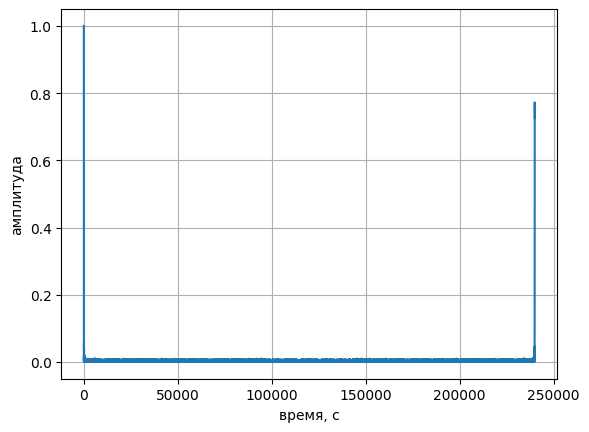

In [109]:
# Перевод во временную область
atr = np.abs(ifft(afr))
atr = atr / max(atr)
plt.plot(atr)
plt.grid()
plt.xlabel('время, с')
plt.ylabel('амплитуда')

In [111]:
# запись скорректированного белого шума
import soundfile as sf

sf.write("noice_my.wav", atr, noise_sample_rate)

229376
229376


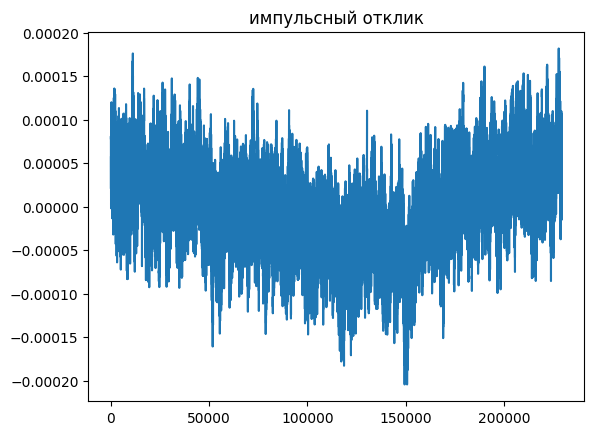

229376

In [133]:
from deconv import deconvolve

reverb, _ = sf.read('скорректированный-шум_1_.wav')
reverb_mono = np.mean(reverb, axis=1) 

# print(len(reverb_mono))
# print(len(noise))
noise_new = noise[:len(reverb_mono)]
h = deconvolve(noise_new, reverb_mono)

print(len(reverb_mono))
print(len(noise_new))
plt.title('импульсный отклик')
plt.plot(h)
plt.show()
len(h)

In [143]:
import scipy

orig, sr = sf.read('gt (1).wav')
restore_rev = scipy.signal.convolve(orig, h, 'full')[:len(orig)]
sf.write('restore.wav', restore_rev, sr)

Этот график импульсного отклика комнаты и свернутый с ним голос получились такими в силу "плохого" микрофона на телефоне, с которого производилась запись аудио 